# 텍스트 전처리기 실습
<br>
강의자: 고려대학교 컴퓨터학과 NLP&AI 연구실 박찬준<br>
강의자: 고려대학교 컴퓨터학과 NLP&AI 연구실 허윤아

## 전통적인 자연어처리 단계




###자연언어처리는 형태소분석 --> 구문분석 -->의미분석 -->화용분석 -->담화분석 이렇게 크게 5가지로 이루어져 있습니다. 

 

####형태소 분석
형태소란 의미를 가지는 가장 최소의 단위입니다. <br>영어 8품사 생각하면 이해하기 쉽습니다! 

####구문분석
명사구, 동사구 처럼 구문구조를 분석하는 것을 의미합니다.
Tree를 만들어주는 거라고 이해하면 됩니다.

#### 의미분석

배가 아프다.배를 먹는다 배를 타다. 이 3가지 배를 과연 컴퓨터가 분류할 수 있을까요?
이것이 바로 의미분석 파트에서 담당하는 언어처리 기술입니다.

#### 화용론
화용론에서는 발화 맥락에 따라 지시체가 바뀌는 ‘나’, ‘지금’, ‘여기’와 같은 지표등을 연구하는 분야. <br>즉 맥락 속에서 사용되는 언어 형식의 사용 원리와 요소 등을 체계적으로 연구<br>
대표적으로 상호참조해결 Task가 있음.

#### 담화분석
챗봇을 생각하시면 됩니다.


## 어절 분리
어절은 영어에서 띄어쓰기 단위라고 생각하면 이해하기 쉽습니다.

In [0]:
import nltk
nltk.download('punkt')

sentences="My name is park"
tokens=nltk.word_tokenize(sentences)
print(tokens)

## 문장 분리
NLTK로 문장 분리도 가능합니다.

In [0]:
import nltk
nltk.download('punkt')

sentences="My name is park. How old are you."
sen=nltk.sent_tokenize(sentences)
print(sen)

##형태소
뜻을 가진 가장 작은 말의 단위 입니다.


입력으로 word_tokenize를 통해 토큰으로 나눈 Token 리스트를 넣어주어야 합니다.<br>
출력은 형태소 품사태깅 된 결과가 나옵니다.

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

sentence="my name is jack and i am 22 years old and my major is natural language processing"

tokens=nltk.word_tokenize(sentence)
tagged=nltk.pos_tag(tokens)

print(tagged) 

##개체명 인식

컴퓨터가 사람이름,장소,지역,조직체를 인식할 수 있을까요?``

즉 Tom lives in NewYork이라는 문장이 있을 때 Tom이 사람이고 NewYork이 장소다는 것을 컴퓨터가 알아차릴 수 있을까요?

그것을 가능하게 하는 것이 바로 NER(Name Entity Recogniton)즉 개체명 인식입니다.

####Named Entity (개체명) : 사람, 조직, 장소 이름 등 이름을 가진 개체

####Name Entity Recognition (개체명 인식) : 텍스트에서 개체명을 인식하고, 그 유형을 알려줌
<br>

개체명인식을 진행하기 위해선 input 데이터로 형태소태깅 된 리스트가 들어와야 됩니다.
 
즉 개체명인식을 진행하기 위해 먼저 nltk.word_tokenize를 진행하고 nltk.pos_tag를 진행한 후 이것을 input으로 넣어야 함을 알 수 있습니다.

In [0]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sent="Mark is studying at Stanford University in California"

tokens=nltk.word_tokenize(sent)
tagged=nltk.pos_tag(tokens)
entities=nltk.chunk.ne_chunk(tagged)

print(entities)


## Edit Distance

NLTK를 통하여 Edit Distance에 대해서 살펴보려고 합니다.

간단히 생각해 2개의 단어가 얼마나 다르냐를 숫자로 표현해주는 것이 Edit Distance입니다.

 

예를 들어 CAT 과  HAT 두단어의 차이는 각 단어의 첫글자인 C와H입니다.

즉 1개의 문자만이 차이가 나죠!!

따라서 CAT과 HAT의 Edit Distance는 1 이되는 것 입니다.

Edit Distance에는 3가지 연산이 있습니다.


### Insertion
### Deletion
### Substitution

​

즉 삽입, 삭제, 교체 총 이렇게 3가지 연산이 존재합니다.


In [0]:
import nltk 
from nltk.metrics import edit_distance 

print(edit_distance("CAT","HAT"))


## Stemming
stem이라는 영어단어 들어보셨나요?

(식물의) 줄기라는 뜻을 가진 영어단어 인데요.언어학에서는 stem을 어간이라고 합니다.

어간은 굴절하는 단어에서 변화하지 않는 부분을 의미합니다.

###스태밍(Stemming)이란 어간추출을 의미합니다 !!

쉽게 말해 형태가 변한 단어로부터 군더더기를 제거하고 그 단어의 원래 모습을 추출하는 것을 말합니다.

예를 들어 going이라는 단어가 있다면 Stemming을 진행할시 go

Computers라는 단어를 Stemming을 진행할 시 Comput 를 추출하는 과정을 Stemming이라고 합니다 .


포터 스태밍 알고리즘(Porter Stemming Algorithm) 은 Stemming에서 가장 유명한 알고리즘입니다.

In [0]:
import nltk 
from nltk.stem import PorterStemmer

pst=PorterStemmer()

print(pst.stem("computers"))
print(pst.stem("going"))


## Lemmatization

Lemmatization이란 문장 속에서 다양한 형태로 활용된(inflected) 단어의 표제어(lemma)를 찾는 일을 뜻합니다. <br> 
여기서 말하는 표제어란 사전에서 단어의 뜻을 찾을 때 쓰는 기본형이라고 생각하면 됩니다.

즉 Lemmatization은 단어의 원형을 추출해주는 녀석이라고 생각하면 이해하기 쉽습니다.


예를들어 is를 Lemmatization하면 be가 되고 ate을 Lemmatization하면 eat이 됩니다.

In [0]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

wlem=WordNetLemmatizer()

print(wlem.lemmatize("ate",pos='v'))
print(wlem.lemmatize("is",pos='v'))
print(wlem.lemmatize("are",pos='v'))

## Stopword

불용어는 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어입니다.


{'above', 'doing', 'too', 'can', 'd', 't', 'then', 'what', 'same', 'himself', 'but', 'with', 'on', 'when', 'so', 'isn', 'his', 'further', 'been', 'being', 'our', 'because', 'are', 'from', 'mustn', 'at', 'between', 'here', 'most', 'ours', 'again', 'shouldn', 'have', 'both', 'below', 'against', 'few', 'wasn', 'those', 'hadn', 'once', 'don', 'ain', 'for', 'under', 'o', 're', 'yourselves', 'them', 'themselves', 've', 'about', 'your', 'ourselves', 'who', 'after', 'or', 'he', 'over', 'this', 'how', 'myself', 'into', 'in', 'such', 'aren', 'hasn', 'before', 'whom', 'won', 's', 'were', 'only', 'herself', 'we', 'that', 'was', 'had', 'no', 'of', 'during', 'down', 'has', 'off', 'while', 'where', 'a', 'if', 'until', 'weren', 'be', 'having', 'theirs', 'doesn', 'will', 'to', 'just', 'her', 'ma', 'll', 'there', 'and', 'does', 'other', 'their', 'own', 'why', 'itself', 'its', 'each', 'by', 'not', 'she', 'some', 'him', 'very', 'm', 'should', 'now', 'couldn', 'yourself', 'these', 'as', 'didn', 'an', 'nor', 'is', 'yours', 'did', 'the', 'do', 'my', 'all', 'needn', 'y', 'which', 'up', 'shan', 'haven', 'through', 'me', 'out', 'mightn', 'wouldn', 'they', 'i', 'you', 'hers', 'it', 'more', 'any', 'am', 'than'}

 

영어에 불용어의 종류로는 이렇게 많은 단어들이 있으며 대부분 검색 시 의미없는 단어들입니다.

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop=set(stopwords.words('english'))
print(stop)

## 문장이 주어졌을 때 불용어를 제외한 단어들만 추출하는 방법


In [0]:
import nltk
from nltk.corpus import stopwords


stop=set(stopwords.words('english'))


sen="I want to go to shopping and a I want to buy some of snack"
tokens=nltk.word_tokenize(sen)

#clean_tokens=[tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop)]

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop):
    clean_tokens.append(tok)

  
print("불용어 포함: ",tokens) 
print("불용어 미포함: ",clean_tokens)  

## 특정한 품사만 추출해보기

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sen="Barack Hussein Obama II is an American politician who served as the 44th President of the United States from 2009 to 2017."

tokens=nltk.word_tokenize(sen)
tagged=nltk.pos_tag(tokens)

#명사추출
#allnoun = [word for word, pos in tagged if pos in ['NN', 'NNP'] ]
allnoun=[]
for word, pos in tagged:
  if pos in ['NN', 'NNP']:
    allnoun.append(word)
    
print("형태소 분석 결과: ",tagged)
print("명사만 추출: ", allnoun)

#동사 추출
#allverb = [word for word, pos in tagged if pos in ['VBZ','VBD'] ]

allverb=[]
for word, pos in tagged:
  if pos in ['VBZ','VBD']:
    allverb.append(word)

print("동사만 추출",allverb)

## HTML 크롤링 후 단어 빈도수 구해보기

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
HTML b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programmin

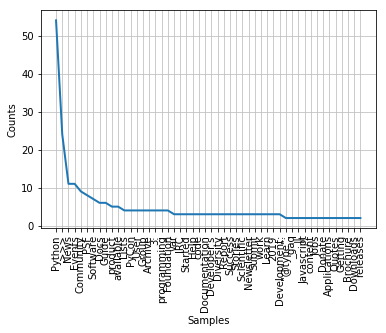

In [2]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
import matplotlib
import matplotlib.pyplot as plt
import random

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


response=urllib.request.urlopen('http://python.org/') #웹에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘응답 객체(HTTPResponse)’를 반환한다.
html=response.read()
print("HTML",html)
#print("Response: ",response)
tokens=re.split('\W+',html.decode('utf-8')) #문자만, re.split()이란 지정한 규칙을 기준으로 문자열을 나눈다., match one or more word characters

print("토큰: ",tokens)

clean=BeautifulSoup(html,'html.parser').get_text() #html 코드 정제 진행

tokens=[]
for tok in clean.split():
  tokens.append(tok) #하나의 리스트로

print("정제",tokens)

stop=set(stopwords.words('english')) #불용어 

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop): #길이가 1 이상 인 것 !! stop word가 아닌 것 !
    clean_tokens.append(tok)

Freq_dist_nltk=nltk.FreqDist(clean_tokens) #FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
Freq_dist_nltk.plot(50, cumulative=False)

## 명사만 추출해보기 - 연습문제

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


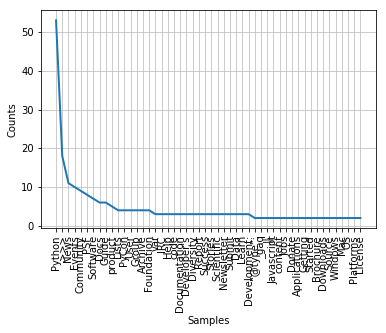

In [0]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
import matplotlib
import matplotlib.pyplot as plt
import random

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


response=urllib.request.urlopen('http://python.org/') 
html=response.read()


tokens=re.split('\W+',html.decode('utf-8'))

clean=BeautifulSoup(html,'html.parser').get_text()   
tokens=[tok for tok in clean.split()]

stop=set(stopwords.words('english')) 

clean_tokens= [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop)] 


#이곳을 채우시오.
tagged=nltk.pos_tag(clean_tokens)

allnoun=[]
for word,pos in tagged:
  if pos in ['NN','NNP']:
    allnoun.append(word)
    
Freq_dist_nltk = nltk.FreqDist(allnoun) 
Freq_dist_nltk.plot(50, cumulative=False)